# 1. Motivation

* **What is your dataset?**
  
  The main dataset focuses on the energy consumption and production in Denmark at a household level, specifically detailing electricity usage, production from solar panels, and interactions with the electrical grid.
  
  The key variables include:
    * Total Power Produced (from solar panels)
    * Total Power Used (household energy consumption)
    * Power Self-Used (energy consumed directly from solar production)
    * Power Bought from Grid

  The data ranges from November 2022 to April 2024. The values are recorded on a daily level.

  Additionally, information on the household location and the age of the household owners is available.


* **Why did you choose this/these particular dataset(s)?**
    
    Among 
    TODO by shakir. 
    
    Relevance to Sustainable Energy Solutions

* **What was your goal for the end user's experience?**

    Initially, the user is presented an overview over the usage and popularity of solar power in Denmark.
    This serves the purpose of illustrating an increased demand for solar panels since 2022 and thus aids comprehending the effects of market mechanisms on the usage and production of solar energy.

# 2. Basic Stats


    Write about your choices in data cleaning and preprocessing
    Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.


The dataset contains 829 individual households and records data on 967 days.
Most households have had solar panel installations after the beginning of the dataset (after November 2022), thus the number of daily recordings increased continuously.

Mostly likely due to reading errors or other technical failures, some outliers with very high daily production or usage levels are identified.
These outliers have been removed from the dataset to avoid a distortion of the data.
Similarly, the individuals with invalid ages such as -42, -37, 0, 1, 2 and 162 have been removed from the dataset.
    

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#import altair as alt

In [28]:
df_raw=pd.read_csv('Data/dfMerged.csv')
df=df_raw.copy()
df['usage_date'] = pd.to_datetime(df['usage_date'],format='%d/%m/%Y')

In [29]:
df.describe()

,user_id,totalBuyPower,totalProductPower,totalUsePower,totalOnGridPower,night_usage,totalSelfUsePower,latitude,longitude,age
count,394744.000000,3.947440e+05,394744.000000,3.947440e+05,394744.000000,394744.000000,394744.000000,392983.000000,392983.000000,394344.000000
mean,901.191410,2.719412e+01,16.040817,3.365139e+01,7.936295,12.336771,8.104521,55.661310,11.860150,53.090926
std,283.980513,7.096028e+03,19.661593,6.718377e+03,12.553714,13.666447,12.504059,0.332955,0.903451,11.992612
min,501.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,54.572157,8.114217,-41.000000
25%,670.000000,5.800000e-01,1.030000,8.290000e+00,0.000000,3.932229,0.740000,55.539918,11.752994,50.000000
50%,852.000000,7.650000e+00,9.280000,1.661000e+01,0.520000,7.724875,5.830000,55.670121,12.163891,54.000000
75%,1098.000000,2.297000e+01,26.760000,3.187000e+01,12.230000,16.168000,11.710000,55.843226,12.399912,56.000000
max,1833.000000,4.458331e+06,4060.870000,4.221060e+06,92.020000,930.508750,4058.030000,57.426306,15.128681,162.000000


In [30]:
df=df[(df.totalUsePower<500) & (df.totalProductPower<500) & (df.totalSelfUsePower<500) & (df.totalBuyPower<500)]

In [31]:
df_ind_age=df_raw.groupby('user_id')['age'].mean()
print(df_ind_age[(df_ind_age<18)|(df_ind_age>90)])
df=df[(df.age>=18) & (df.age<=99)]

user_id
549       1.0
571       1.0
619       2.0
668       2.0
725       2.0
746       0.0
1045    -41.0
1121    -37.0
1402      0.0
1644      1.0
1657      1.0
1817    162.0
Name: age, dtype: float64


In [32]:
df_day=df['usage_date'].value_counts(ascending=False).sort_index()
df_user=df['user_id'].value_counts(ascending=False).sort_index()

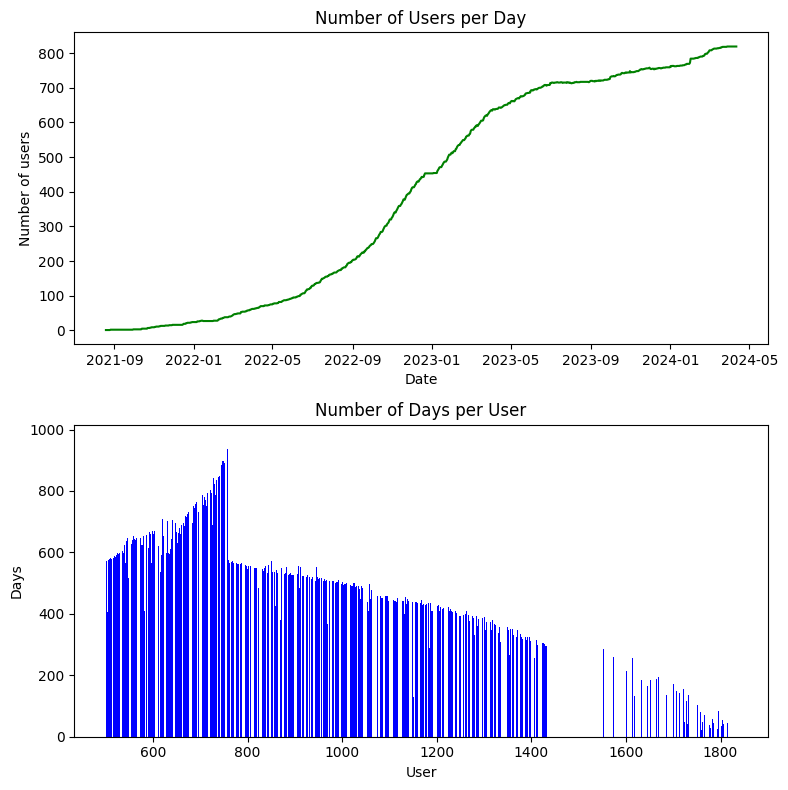

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot df_day
axs[0].plot(df_day.index, df_day.values,color='green')
axs[0].set_title('Number of Users per Day')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of users')

# Plot df_user
axs[1].bar(df_user.index, df_user.values,color='blue')
axs[1].set_title('Number of Days per User')
axs[1].set_xlabel('User')
axs[1].set_ylabel('Days')

plt.tight_layout()
plt.show()

# 3. Data Analysis

Describe your data analysis and explain what you've learned about the dataset.

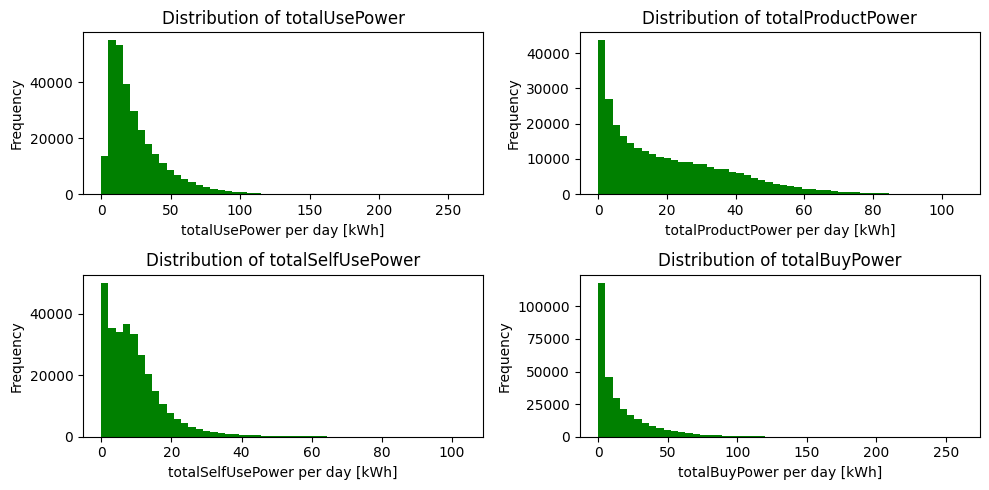

In [34]:
features=['totalUsePower','totalProductPower','totalSelfUsePower','totalBuyPower']
df_reduced=df.copy()
df_reduced=df_reduced[(df_reduced.totalUsePower>0) & (df_reduced.totalProductPower>0) & (df_reduced.totalSelfUsePower>0) & (df_reduced.totalBuyPower>0)]

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # counts, bins, _ = axs[row, col].hist(df_reduced[feature], bins=50)
    # non_zero_bins = bins[:-1][counts > 0]
    axs[row, col].hist(df_reduced[feature], bins=50,color='green')
    axs[row, col].set_title(f"Distribution of {feature}")
    axs[row, col].set_xlabel(f"{feature} per day [kWh]")
    axs[row, col].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Age groups for data privacy

In [ ]:
age_by_user = df.groupby('user_id')['age'].mean().value_counts().sort_index()

In [49]:
age_by_user.drop(index=54,inplace=True)

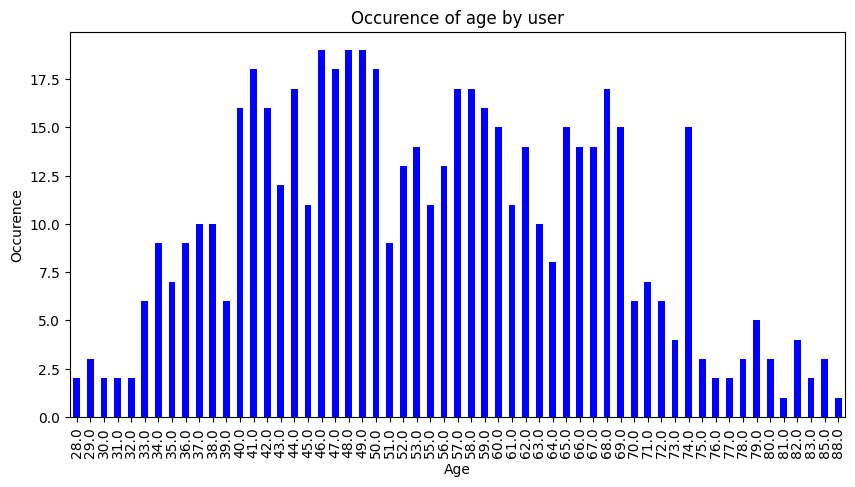

In [50]:
plt.figure(figsize=(10, 5))

age_by_user.plot(kind='bar', color='blue')

plt.xlabel('Age')
plt.ylabel('Occurence')
plt.title('Occurence of age by user')

plt.show()

In [51]:
age_by_user.sum()/4

140.25

In [67]:
age_group1=df[df.age<=44]
age_group2=df[(df.age>44) & (df.age<=53)]
age_group3=df[(df.age>54) & (df.age<=64)]
age_group4=df[df.age>64]

In [68]:
print(len(age_group1),len(age_group2),len(age_group3),len(age_group4))

58026 58304 53462 52955


In [64]:
age_by_user.cumsum()

28.0      2
29.0      5
30.0      7
31.0      9
32.0     11
33.0     17
34.0     26
35.0     33
36.0     42
37.0     52
38.0     62
39.0     68
40.0     84
41.0    102
42.0    118
43.0    130
44.0    147
45.0    158
46.0    177
47.0    195
48.0    214
49.0    233
50.0    251
51.0    260
52.0    273
53.0    287
55.0    298
56.0    311
57.0    328
58.0    345
59.0    361
60.0    376
61.0    387
62.0    401
63.0    411
64.0    419
65.0    434
66.0    448
67.0    462
68.0    479
69.0    494
70.0    500
71.0    507
72.0    513
73.0    517
74.0    532
75.0    535
76.0    537
77.0    539
78.0    542
79.0    547
80.0    550
81.0    551
82.0    555
83.0    557
85.0    560
88.0    561
Name: age, dtype: int64

<Axes: >

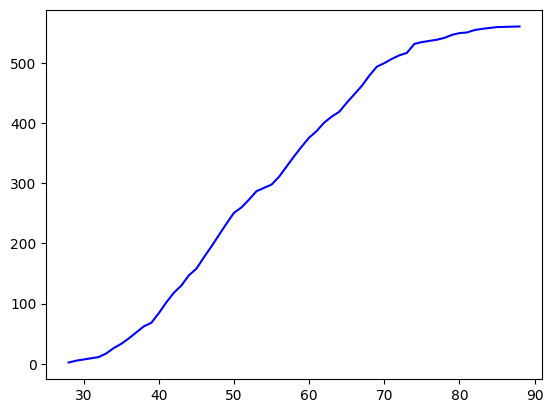

In [52]:
age_by_user.cumsum().plot(kind='line', color='blue')

In [36]:
len(df[df.age==54])/len(df)

0.4264892170796515

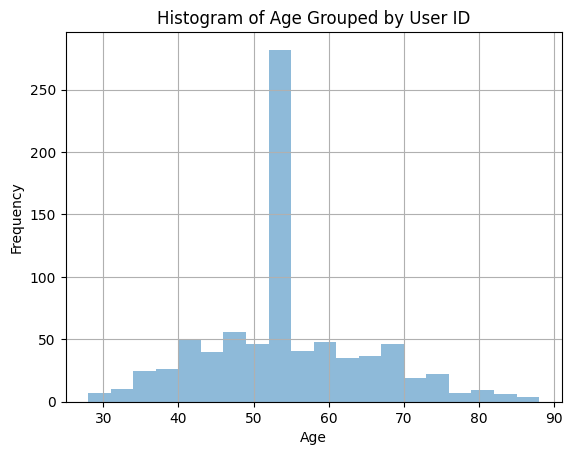

In [37]:
df.groupby('user_id')['age'].mean().hist(alpha=0.5, bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Grouped by User ID')
plt.show()

# 4. Genre

Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?


# 5. Visualizations

Argue choice of visualization, explain in detail.

## Solar Energy Data in Denmark

In [38]:
 # Google Data
    googleData = pd.read_csv('../final/data/multiTimeline.csv', header=1)
    googleData['Week'] = googleData['Uge']
    googleData['Week'] = pd.to_datetime(googleData['Week'], format='%Y-%m-%d')
    googleData['Index'] = googleData['Solcelle: (Danmark)'].astype(float)

    # Energinet Data
    energinetData = pd.read_csv('../final/data/energinetForecast.csv', sep=';', usecols=['HourDK', 'ForecastCurrent'])    
    energinetData['HourDK'] = pd.to_datetime(energinetData['HourDK'])
    energinetData['Production (MWh per hour)'] = energinetData['ForecastCurrent'].str.replace(',', '.').astype(float)    
    
    energinetData.set_index('HourDK', inplace=True)
    energinetData = energinetData.resample('W').agg({'Production (MWh per hour)': 'sum'}).reset_index()
    energinetData.rename(columns={'HourDK': 'Week'}, inplace=True)

    # Gas Prices Data. Source: https://ens.dk/service/statistik-data-noegletal-og-kort/priser-paa-el-og-gas
    gasPrices = pd.read_csv('../final/data/gasPrices.csv', sep=',')
    gasPrices['Date'] = pd.to_datetime(gasPrices['month'], format='%YM%m')
    gasPrices['Price DKK/GJ'] = gasPrices['price kr/GJ']

    # Start date from energinetData minimum date
    startDate = energinetData['Week'].min()
    gasPrices = gasPrices[gasPrices['Date'] >= startDate]    

    # Sort by 'Week'
    energinetData = energinetData.sort_values(by='Week')

    # set minimum date to match in both dataframes. Use the maximum of the two minimum dates
    minDate = max(energinetData['Week'].min(), googleData['Week'].min())
    energinetData = energinetData[energinetData['Week'] >= minDate]
    googleData = googleData[googleData['Week'] >= minDate]        

    # accumulate the forecast data
    energinetData['Accumulated Production (MWh per hour)'] = energinetData['Production (MWh per hour)'].cumsum()

    # Filters
    dateRange = st.sidebar.date_input("Filter data by date range", value=(energinetData['Week'].min(), energinetData['Week'].max()), min_value=energinetData['Week'].min(), max_value=energinetData['Week'].max())
    
    # help: source https://www.energidataservice.dk/tso-electricity/Forecasts_Hour
    st.subheader("Denmark's Solar Power Surge and Seasonal Trends in Response to Rising Gas Prices")    
    st.write('This time series graph portrays the solar power production in Denmark from 2020 through April 2024 in MWh per hour. The data exhibits clear seasonality, with production escalating in summer due to more sunlight and receding in winter. Interestingly, before the pronounced production dip at the end of 2023, there\'s an exceptional peak surpassing other summer highs. This peak corresponds to a dramatic hike in gas prices in the winter 2022, reaching 27 kr per m³ in its highest, prompting increased dependency on solar energy. Additionally, the early onset of the 2024 summer production peak suggests an acceleration in solar investments by private households and others, resulting in a more substantial and earlier increase in solar power generation.')

    showPeaks = st.checkbox('Highlight Peaks', value=False, key='showPeaks')

    energinetData['Date'] = energinetData['Week'].dt.date
    googleData['Date'] = googleData['Week'].dt.date
    gasPrices['Date'] = gasPrices['Date'].dt.date

    if len(dateRange) < 2:
        st.spinner('Please select a date range of at least two different dates.')
    else:
        energinetData = energinetData[(energinetData['Date'] >= dateRange[0]) & (energinetData['Date'] <= dateRange[1])]
        googleData = googleData[(googleData['Date'] >= dateRange[0]) & (googleData['Date'] <= dateRange[1])]
        gasPrices = gasPrices[(gasPrices['Date'] >= dateRange[0]) & (gasPrices['Date'] <= dateRange[1])]

    energinetData['Above_15000'] = energinetData['Production (MWh per hour)'] > 15000
    energinetData['Segment'] = energinetData['Above_15000'].astype(int).diff().ne(0).cumsum()
    df_endpoints = energinetData.copy()
    df_endpoints['Date'] = df_endpoints['Date'].shift(-1)
    df_endpoints['Production (MWh per hour)'] = df_endpoints['Production (MWh per hour)'].shift(-1)
    df_final = pd.concat([energinetData, df_endpoints]).sort_values(by=['Date', 'Segment']).dropna()
    base = alt.Chart(df_final).encode(
        x='Week:O',  # Ordinal data
        y='Production (MWh per hour):Q',  # Quantitative data
        detail='Segment:N'  # Use segment number as detail to differentiate lines
    )
    lines = base.mark_line().encode(
        x=alt.X('Date:T'), 
        color=alt.condition(
            alt.datum.Above_15000,
            alt.value('lightgreen' if showPeaks else 'green'),  # True color
            alt.value('green')  # False color
        )
    )


    googleData['Date'] = pd.to_datetime(googleData['Date'])
    gasPrices['Date'] = pd.to_datetime(gasPrices['Date'])
    date_range = pd.date_range(start=googleData['Date'].min(), end=googleData['Date'].max())
    date_df = pd.DataFrame(date_range, columns=['Date'])
    googleData = pd.merge(date_df, googleData, on='Date', how='outer')
    gasPrices = pd.merge(date_df, gasPrices, on='Date', how='outer')
    googleData['Index'] = googleData['Index'].interpolate(method='linear')
    gasPrices['Price DKK/GJ'] = gasPrices['Price DKK/GJ'].interpolate(method='linear')
    mergedData = pd.merge(googleData, gasPrices, on='Date', how='outer')

    # Base chart
    base = alt.Chart(mergedData).encode(
        alt.X('Date:T')
    )

    # First line chart
    line1 = base.mark_line(color='blue').encode(
        alt.Y('Index', axis=alt.Axis(title='Index', titleColor='blue'))
    )

    # Second line chart
    line2 = base.mark_line(color='red').encode(
        alt.Y('Price DKK/GJ', axis=alt.Axis(title='Price DKK/GJ', titleColor='red', grid=True))
    )

IndentationError: unexpected indent (2766882163.py, line 2)

## EasyGreen Geospatial Data

Make age groups

In [ ]:
data = data.groupby('user_id').agg({'usage_date': 'min',
                                        'totalProductPower': 'mean',
                                        'totalSelfUsePower': 'mean',
                                        'latitude': 'mean',
                                        'longitude': 'mean',
                                        'age': 'mean'}).reset_index()
                

    # Drop rows with missing latitude or longitude
    data.dropna(subset=['latitude', 'longitude', 'totalProductPower', 'totalSelfUsePower', 'age'], inplace=True)

    # Sort by usage_date
    data = data.sort_values(by='usage_date')

    # Filters

    ## example return (datetime.date(2024, 1, 31), datetime.date(2024, 3, 28))
    selected_date_range = st.sidebar.date_input("Filter map by system installation date", value=(data['usage_date'].min(), data['usage_date'].max()), min_value=data['usage_date'].min(), max_value=data['usage_date'].max())
    selected_date_range = pd.to_datetime(selected_date_range)

    if len(selected_date_range.unique()) < 2:
        st.spinner('Please select a date range of at least two different dates.')
    else:
        data = data[(data['usage_date'] >= selected_date_range[0]) & (data['usage_date'] <= selected_date_range[1])]

    ## Age range
    age_range = st.sidebar.slider("Filter map by customer age range", 0, 100, (0, 100))
    data = data[(data['age'] >= age_range[0]) & (data['age'] <= age_range [1])]

    ## Production range
    max_range = int(data['totalProductPower'].max())
    production_range = st.sidebar.slider("Filter map by daily production range", 0, max_range, (0, max_range))
    data = data[(data['totalProductPower'] >= production_range[0]) & (data['totalProductPower'] <= production_range[1])]

    data.reset_index(inplace=True)

    elevation = st.sidebar.radio("Analyze Map By", ('Average Production Per Day', 'Age'))
    
    if elevation == 'Average Production Per Day':
        elevation_weight = 'totalProductPower'
    elif elevation == 'Average Utilized Production Per Day':
        elevation_weight = 'totalSelfUsePower'
    elif elevation == 'Age':
        elevation_weight = 'age'
    
    if elevation == 'Average Production Per Day':
        st.subheader("Visualization of Solar Power Production by EasyGreen Customers Across Denmark")
        st.write('')
        st.write("One way to represent data provided by EasyGreen is to spatially visualize the solar power production of their customers across Denmark. The age group and location of each household are provided and allow for a detailed analysis. Feel free to explore the data by adjusting the sliders on the sidebar.")
        st.write('The plot displays a 3D hexagonal bin map visualization centered over Denmark, highlighting solar power production data for EasyGreen\'s customers. Each hexagonal column represents the geographic clustering of customers, and the height of the columns is proportional to the average daily solar power production. The highest solar power outputs are indicated by the tallest columns, color-coded in red and orange. The map provides geographic and quantitative insights into solar power distribution among EasyGreen\'s customer base.')
    elif elevation == 'Age':
        st.subheader("Visualization of EasyGreen's Customer Age Distribution Across Denmark")
        st.write('The plot displays a heatmap distribution of EasyGreen\'s customers across Denmark, color-coded by age. The most concentrated areas with the oldest customer base are shown in red, with decreasing age groups represented by cooler colors, yellow to white. The densest area of older customers is located in the eastern part of Denmark. The heatmap settings have been configured to restrict zooming capabilities to safeguard privacy, ensuring individual customer data cannot be discerned, allowing only a macro view of the age distribution.')


    layer = pdk.Layer(
        "HexagonLayer" if elevation_weight != 'age' else "HeatmapLayer",
        data=data,
        get_position="[longitude, latitude]",
        auto_highlight=True,
        elevation_scale=3000,
        pickable=True,
        get_polygon="-",
        get_fill_color=[0, 0, 0, 20],
        stroked=False,
        elevation_range=[0, max_range],
        extruded=True,
        coverage=1,
        get_elevation_weight = elevation_weight,
    )

    view_state = pdk.ViewState(
        longitude=10.38831, latitude=55.79594, zoom=6.2, min_zoom=5, max_zoom=11 if elevation_weight != 'age' else 7, pitch=41 if elevation_weight != 'age' else 0, bearing=20 if elevation_weight != 'age' else 0, height=700
    )


    # Combined all of it and render a viewport
    r = pdk.Deck(
        map_style="mapbox://styles/mapbox/dark-v9",
        layers=[layer],
        initial_view_state=view_state,
        tooltip={
                "html":f"<b>{elevation}:</b> {{elevationValue}}<br>",
                "style": {"color": "white"}}        
    )

## Energy Dynamics: Comparing Production and Usage

In [ ]:
data['usage_month'] = data['usage_date'].dt.month 

    # Ensure 'totalProductPower' is float and apply conditions
    data['totalProductPower'] = data['totalProductPower'].astype(float)
    data['totalProductPower'] = data['totalProductPower'].apply(lambda x: max(0, min(x, 10000)))

    # Convert 'usage_date' to month names
    data['usage_month'] = data['usage_date'].dt.strftime('%B')
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    data['usage_month'] = pd.Categorical(data['usage_month'], categories=month_order, ordered=True)

    # Ensure 'totalProductPower' is float and apply conditions
    data['totalProductPower'] = data['totalProductPower'].astype(float)
    data['totalProductPower'] = data['totalProductPower'].apply(lambda x: max(0, min(x, 10000)))

    # Chart data
    production_data = data.groupby('usage_month')['totalProductPower'].mean().reset_index()
    self_use_data = data.groupby('usage_month')['totalSelfUsePower'].mean().reset_index()
    totalUsePower_data = data.groupby('usage_month')['totalUsePower'].mean().reset_index()
    night_data = data.groupby('usage_month')['night_usage'].mean().reset_index()

    # Charts
    production_chart = alt.Chart(production_data).mark_bar(color = 'green', opacity=0.5).encode(
        x=alt.X('usage_month:N', title='Month', sort=month_order),  # Specify nominal data with :N
        y=alt.Y('totalProductPower:Q', title='Production in kWh per day'),  # Specify quantitative data with :Q
            tooltip=[
                alt.Tooltip('usage_month:N', title='Month'),
                alt.Tooltip('totalProductPower:Q', title='Average Production per Day')
            ]
    ).properties(
        height=600
    )

    selfUse_chart = alt.Chart(self_use_data).mark_bar(color = 'green').encode(
            x=alt.X('usage_month:N', sort=month_order),  # Specify nominal data with :N
            y=alt.Y('totalSelfUsePower:Q'),  # Specify quantitative data with :Q
            tooltip=[
                alt.Tooltip('usage_month:N', title='Month'),
                alt.Tooltip('totalSelfUsePower:Q', title='Average Utilized Production per Day')
            ]
        ).properties(
            height=600
    )

    use_chart = alt.Chart(totalUsePower_data).mark_bar(color = 'red', opacity=0.5).encode(
            x=alt.X('usage_month:N', sort=month_order, title = 'Month'),  # Specify nominal data with :N
            y=alt.Y('totalUsePower:Q', title= 'Usage in kWh per day'),
            tooltip=[
                alt.Tooltip('usage_month:N', title='Month'),
                alt.Tooltip('totalUsePower:Q', title='Usage in kWh per Day')
            ]
        ).properties(
            height=600
    )

    nightUsage_chart = alt.Chart(night_data).mark_bar(color = 'red').encode(
            x=alt.X('usage_month:N', sort=month_order),
            y=alt.Y('night_usage:Q'),
            tooltip=[
                alt.Tooltip('usage_month:N', title='Month'),
                alt.Tooltip('night_usage:Q', title='Avg. Night Usage per Day')
            ]
        ).properties(
            height=600
    )

# 6. Discussion

Generally, the website design and the implementation and interpretation of the visualizations went well.
The data was represented in several different approaches and set into a larger context.

However, combining the insights from the different plots and drawing conclusions was quite challenging. More research and background knowledge would be required to 

# 7. Contributions

| Name | Shakir Maytham Shaker | Magnus Mac Doberenz | Yili Ge |
|----------|----------|----------|----------|
| Data cleaning  | In charge | Revise | Revise  |
| Data preliminary analysis  | Revise | In charge | In charge |
| Data deep analysis   | In charge | In charge | In charge |
| Visualizations| In charge | Revise | Revise |